# Get Data and Clean

### Imports:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
parent_dir = '../../'

In [4]:
df = pd.read_csv(parent_dir + 'data/creditcard.csv')
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

From the docs, we know that time is the number of seconds between each transaction and the first transaction (for reference there are 86,400 seconds in a day).

The features preceeding with a 'V' are likely the result of PCA in order to preserve privacy of customers.  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Looking at the 'time' feature, we see the max value is 172,792 which is about how many seconds there are in 2 days (172,800) so this is indeed the transactions in 2 days.  

Make columns lowercase:

In [9]:
df.rename(columns = {'Time': 'time', 'Amount': 'amount', 'Class': 'fraudulent'}, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
time          284807 non-null float64
V1            284807 non-null float64
V2            284807 non-null float64
V3            284807 non-null float64
V4            284807 non-null float64
V5            284807 non-null float64
V6            284807 non-null float64
V7            284807 non-null float64
V8            284807 non-null float64
V9            284807 non-null float64
V10           284807 non-null float64
V11           284807 non-null float64
V12           284807 non-null float64
V13           284807 non-null float64
V14           284807 non-null float64
V15           284807 non-null float64
V16           284807 non-null float64
V17           284807 non-null float64
V18           284807 non-null float64
V19           284807 non-null float64
V20           284807 non-null float64
V21           284807 non-null float64
V22           284807 non-null float64
V23           2

Check target variable and class imbalance:

In [13]:
df.fraudulent.unique()

array([0, 1])

In [15]:
df.fraudulent.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: fraudulent, dtype: float64

So, as mentioned in the debrief, only 0.1727% of transactions have been labelled as fraudulent.  

In [19]:
fraud_perc = pd.DataFrame(df.fraudulent.value_counts()/len(df.fraudulent))
fraud_perc

,fraudulent
0,0.998273
1,0.001727


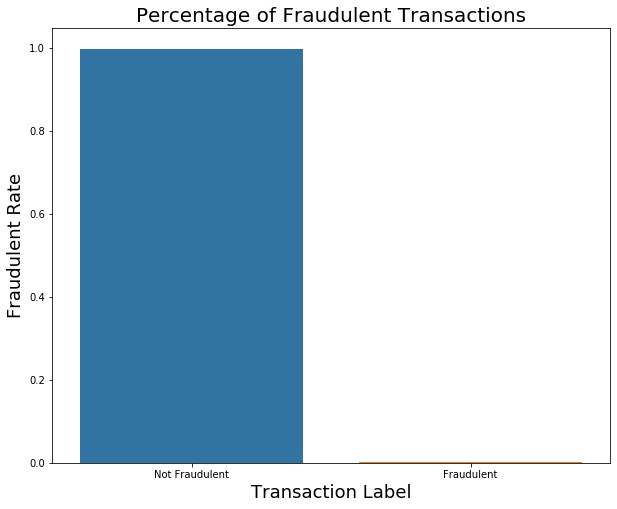

In [21]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(x = [0, 1], y = 'fraudulent', data = fraud_perc, ax = ax)
plt.title('Percentage of Fraudulent Transactions', fontsize = 20)
plt.xlabel('Transaction Label', fontsize = 18)
plt.ylabel('Fraudulent Rate', fontsize = 18)
ax.set_xticklabels(['Not Fraudulent', 'Fraudulent'])
plt.savefig(parent_dir + 'figures/class_imbalance.png')

## Prepare for Modelling
### Train, Test, Split:

We want to make sure that we don't see, use and/or manipulate any of the training data so let's separate that out now. 

Because this dataset is so imbalanced with such a small percentage of positive cases, we want to make sure our training and test sets have the same proportion of classes in them, so we'll set the `stratify` argument in the `train_test_split` to ensure this happens:

In [23]:
train_df, test_df = train_test_split(df, stratify = df.fraudulent, test_size = 0.2, random_state = 15)

Let's also create a validation set:

In [24]:
train_df, val_df = train_test_split(df, stratify = df.fraudulent, test_size = 0.2, random_state = 15)

Verify stratification:

In [26]:
# train:
print(f'Train frauds:  \n {train_df.fraudulent.value_counts(normalize = True)}')
print(f'Val frauds:  \n {val_df.fraudulent.value_counts(normalize = True)}')
print(f'Test frauds:  \n {test_df.fraudulent.value_counts(normalize = True)}')

Train frauds:  
 0    0.998271
1    0.001729
Name: fraudulent, dtype: float64
Val frauds:  
 0    0.99828
1    0.00172
Name: fraudulent, dtype: float64
Test frauds:  
 0    0.99828
1    0.00172
Name: fraudulent, dtype: float64
